# Prueba para todos los joints con movimiento sinusoidal + velocidad
## Coding
### Importando librerías


In [2]:
#importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LeakyReLU

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Plotting data

### Muestra de data para una ventana de 3000 datos

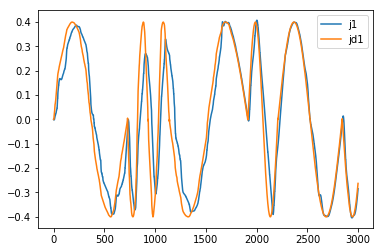

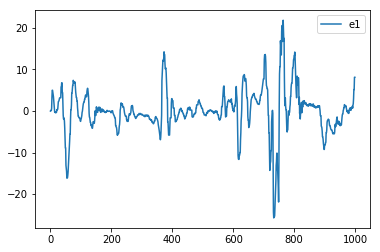

In [36]:
df = pd.read_csv('training_data_jointall.csv')
#df_eval = pd.read_csv('evaluation_data_jointall.csv')
df_val = pd.read_csv('validation_data_jointall.csv')
fig1 = plt.figure()
df.j1[0:3000].plot()
df.jd1[0:3000].plot(); plt.legend(loc='best')
fig2 = plt.figure(); df.e1[0:1000].plot(); plt.legend(loc='best')

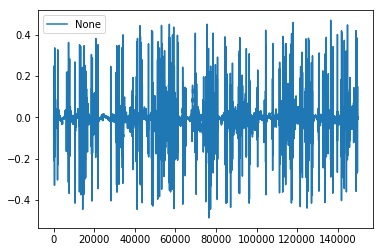

In [6]:
delta_j4 = df.j4 - df.jd4
fig3 = plt.figure(); delta_j4.plot(); plt.legend(loc='best')
#delta_j7.head()
df['delta_j4'] = delta_j4

### Plotting delta rad vs effort

<Figure size 432x288 with 0 Axes>

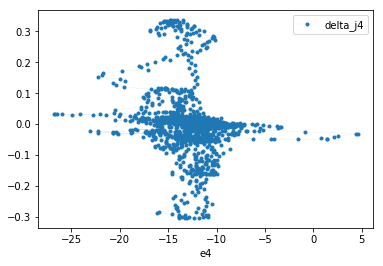

In [7]:
fig4 = plt.figure(); df[500:2000].plot(x = 'e4', y = 'delta_j4', marker='.',lw=0.05); plt.legend(loc='best')

### Prueba de validación para modelo FFNN
#### Solo Neuronas Lineales (model1)
Se utiliza un modelo de 1 input layer de 15 neuronas lineales, 2 hidden layers de 15 neuronas lineales y 1 output layer de 2 neuronas lineales.  

In [9]:
# Generating model
model1 = Sequential()
model1.add(Dense(units=200, activation='linear', input_dim=21))
model1.add(Dense(units=200, activation='linear'))
model1.add(Dense(units=200, activation='linear'))
model1.add(Dense(units=200, activation='linear'))
model1.add(Dense(units=200, activation='linear'))
model1.add(Dense(units=7, activation='linear'))

model1.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])

(number_training_data, _) = df.shape
q1_tmp = df.j1.values.reshape(number_training_data,1)
q2_tmp = df.j2.values.reshape(number_training_data,1)
q3_tmp = df.j3.values.reshape(number_training_data,1)
q4_tmp = df.j4.values.reshape(number_training_data,1)
q5_tmp = df.j5.values.reshape(number_training_data,1)
q6_tmp = df.j6.values.reshape(number_training_data,1)
q7_tmp = df.j7.values.reshape(number_training_data,1)
T1_tmp = df.e1.values.reshape(number_training_data,1)
T2_tmp = df.e2.values.reshape(number_training_data,1)
T3_tmp = df.e3.values.reshape(number_training_data,1)
T4_tmp = df.e4.values.reshape(number_training_data,1)
T5_tmp = df.e5.values.reshape(number_training_data,1)
T6_tmp = df.e6.values.reshape(number_training_data,1)
T7_tmp = df.e7.values.reshape(number_training_data,1)
v1_tmp = df.v1.values.reshape(number_training_data,1)
v2_tmp = df.v2.values.reshape(number_training_data,1)
v3_tmp = df.v3.values.reshape(number_training_data,1)
v4_tmp = df.v4.values.reshape(number_training_data,1)
v5_tmp = df.v5.values.reshape(number_training_data,1)
v6_tmp = df.v6.values.reshape(number_training_data,1)
v7_tmp = df.v7.values.reshape(number_training_data,1)
qd1_tmp = df.jd1.values.reshape(number_training_data,1)
qd2_tmp = df.jd2.values.reshape(number_training_data,1)
qd3_tmp = df.jd3.values.reshape(number_training_data,1)
qd4_tmp = df.jd4.values.reshape(number_training_data,1)
qd5_tmp = df.jd5.values.reshape(number_training_data,1)
qd6_tmp = df.jd6.values.reshape(number_training_data,1)
qd7_tmp = df.jd7.values.reshape(number_training_data,1)

x_train = np.concatenate([q1_tmp,q2_tmp,q3_tmp,q4_tmp,q5_tmp,q6_tmp,q7_tmp,v1_tmp,v2_tmp,v3_tmp,v4_tmp,v5_tmp,v6_tmp,v7_tmp,T1_tmp,T2_tmp,T3_tmp,T4_tmp,T5_tmp,T6_tmp,T7_tmp], axis =1)
y_train = np.concatenate([qd1_tmp,qd2_tmp,qd3_tmp,qd4_tmp,qd5_tmp,qd6_tmp,qd7_tmp], axis =1)

#print x_train.shape
#print y_train.shape


#### Feeding data

In [10]:
model1.fit(x_train, y_train, epochs=20, batch_size=30)

Epoch 1/20
150001/150001 [==============================] - 39s 258us/step - loss: 0.0922 - acc: 0.6529
Epoch 2/20
150001/150001 [==============================] - 37s 246us/step - loss: 0.2050 - acc: 0.6888
Epoch 3/20
150001/150001 [==============================] - 37s 245us/step - loss: 0.0049 - acc: 0.7312
Epoch 4/20
150001/150001 [==============================] - 37s 247us/step - loss: 0.0049 - acc: 0.7285
Epoch 5/20
150001/150001 [==============================] - 37s 250us/step - loss: 0.0054 - acc: 0.7118
Epoch 6/20
150001/150001 [==============================] - 38s 251us/step - loss: 0.0053 - acc: 0.7122
Epoch 7/20
150001/150001 [==============================] - 38s 251us/step - loss: 0.0050 - acc: 0.7240
Epoch 8/20
150001/150001 [==============================] - 38s 252us/step - loss: 0.0049 - acc: 0.7292
Epoch 9/20
150001/150001 [==============================] - 38s 253us/step - loss: 0.0048 - acc: 0.7321
Epoch 10/20
150001/150001 [==============================] - 38s

10001/10001 [==============================] - 1s 58us/step


[3.432593997229309e-05, 9.998999876494932e-05]

In [40]:
(number_validation_data, _) = df_val.shape
q1_tmp = df_val.j1.values.reshape(number_validation_data,1)
q2_tmp = df_val.j2.values.reshape(number_validation_data,1)
q3_tmp = df_val.j3.values.reshape(number_validation_data,1)
q4_tmp = df_val.j4.values.reshape(number_validation_data,1)
q5_tmp = df_val.j5.values.reshape(number_validation_data,1)
q6_tmp = df_val.j6.values.reshape(number_validation_data,1)
q7_tmp = df_val.j7.values.reshape(number_validation_data,1)
T1_tmp = df_val.e1.values.reshape(number_validation_data,1)
T2_tmp = df_val.e2.values.reshape(number_validation_data,1)
T3_tmp = df_val.e3.values.reshape(number_validation_data,1)
T4_tmp = df_val.e4.values.reshape(number_validation_data,1)
T5_tmp = df_val.e5.values.reshape(number_validation_data,1)
T6_tmp = df_val.e6.values.reshape(number_validation_data,1)
T7_tmp = df_val.e7.values.reshape(number_validation_data,1)
v1_tmp = df_val.v1.values.reshape(number_validation_data,1)
v2_tmp = df_val.v2.values.reshape(number_validation_data,1)
v3_tmp = df_val.v3.values.reshape(number_validation_data,1)
v4_tmp = df_val.v4.values.reshape(number_validation_data,1)
v5_tmp = df_val.v5.values.reshape(number_validation_data,1)
v6_tmp = df_val.v6.values.reshape(number_validation_data,1)
v7_tmp = df_val.v7.values.reshape(number_validation_data,1)
qd1_tmp = df_val.jd1.values.reshape(number_validation_data,1)
qd2_tmp = df_val.jd2.values.reshape(number_validation_data,1)
qd3_tmp = df_val.jd3.values.reshape(number_validation_data,1)
qd4_tmp = df_val.jd4.values.reshape(number_validation_data,1)
qd5_tmp = df_val.jd5.values.reshape(number_validation_data,1)
qd6_tmp = df_val.jd6.values.reshape(number_validation_data,1)
qd7_tmp = df_val.jd7.values.reshape(number_validation_data,1)

x_val = np.concatenate([q1_tmp,q2_tmp,q3_tmp,q4_tmp,q5_tmp,q6_tmp,q7_tmp,v1_tmp,v2_tmp,v3_tmp,v4_tmp,v5_tmp,v6_tmp,v7_tmp,T1_tmp,T2_tmp,T3_tmp,T4_tmp,T5_tmp,T6_tmp,T7_tmp], axis =1)
y_val = np.concatenate([qd1_tmp,qd2_tmp,qd3_tmp,qd4_tmp,qd5_tmp,qd6_tmp,qd7_tmp], axis =1)

x_tmp = np.arange(number_validation_data*2).reshape(number_validation_data,2)

In [41]:
y1_pred = model1.predict(x_val)
y1_pred[1,:].shape

(7,)

In [42]:
df_val['y1_pred'] = y1_pred[:,0]
df_val['y2_pred'] = y1_pred[:,1]
df_val['y3_pred'] = y1_pred[:,2]
df_val['y4_pred'] = y1_pred[:,3]
df_val['y5_pred'] = y1_pred[:,4]
df_val['y6_pred'] = y1_pred[:,5]
df_val['y7_pred'] = y1_pred[:,6]

<Figure size 432x288 with 0 Axes>

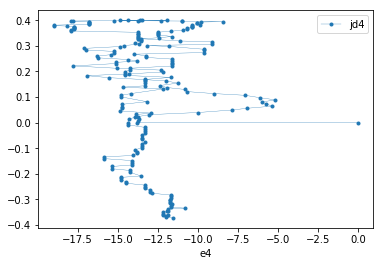

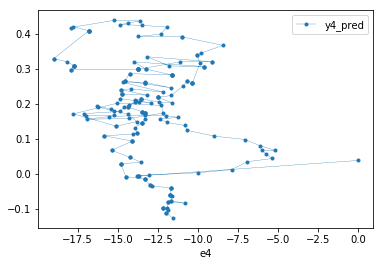

In [43]:
fig5 = plt.figure(); df_val[0:200].plot(x = 'e4', y = 'jd4', marker='.',lw=0.3)
df_val[0:200].plot(x = 'e4', y = 'y4_pred', marker='.',lw=0.3); plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

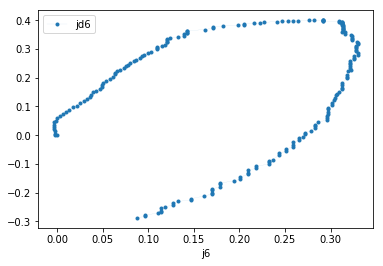

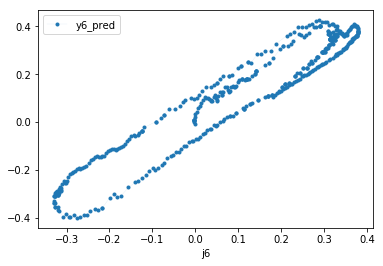

In [44]:
fig6 = plt.figure(); df_val[0:200].plot(x = 'j6', y = 'jd6', marker='.',lw=0.05)
df_val[0:500].plot(x = 'j6', y = 'y6_pred', marker='.',lw=0.05); plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

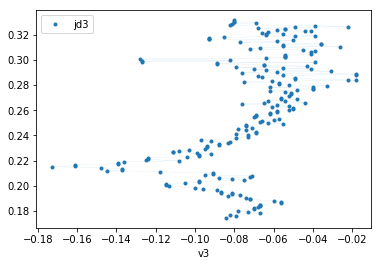

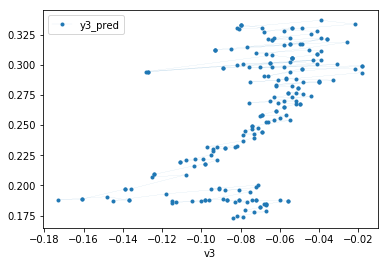

In [48]:
fig6 = plt.figure(); df_val[1000:1200].plot(x = 'v3', y = 'jd3', marker='.',lw=0.05)
df_val[1000:1200].plot(x = 'v3', y = 'y3_pred', marker='.',lw=0.05); plt.legend(loc='best')

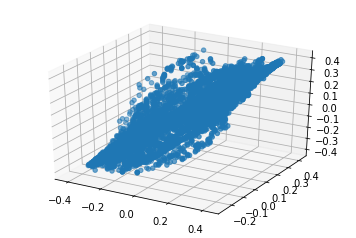

In [16]:
from mpl_toolkits.mplot3d import Axes3D
new_fig = plt.figure().gca(projection='3d')
#ax = new_fig.add_subplot(111, projection='3d')
new_fig.scatter(df_val['j7'], df_val['e7'], df_val['jd7'])
plt.show()


### Neuronas  con función de activación sigmoid
Se utiliza un modelo de 1 input layer de 20 neuronas lineales, 2 hidden layers de 20 neuronas sigmoides y 1 output layer de 2 neuronas lineales.  

In [19]:
model2 = Sequential()
model2.add(Dense(units=200, activation='linear', input_dim=21))
model2.add(Dense(units=200, activation='sigmoid'))
model2.add(Dense(units=200, activation='sigmoid'))
model2.add(Dense(units=200, activation='linear'))
model2.add(Dense(units=7, activation='linear'))

model2.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])


#### Feeding data

In [21]:
model2.fit(x_train, y_train, epochs=20, batch_size=50)

Epoch 1/20
150001/150001 [==============================] - 23s 155us/step - loss: 0.0018 - acc: 0.7848
Epoch 2/20
150001/150001 [==============================] - 23s 151us/step - loss: 0.0017 - acc: 0.7878
Epoch 3/20
150001/150001 [==============================] - 23s 152us/step - loss: 0.0016 - acc: 0.7924
Epoch 4/20
150001/150001 [==============================] - 23s 151us/step - loss: 0.0015 - acc: 0.7945
Epoch 5/20
150001/150001 [==============================] - 23s 152us/step - loss: 0.0014 - acc: 0.7979
Epoch 6/20
150001/150001 [==============================] - 23s 152us/step - loss: 0.0014 - acc: 0.8011
Epoch 7/20
150001/150001 [==============================] - 23s 152us/step - loss: 0.0013 - acc: 0.8035
Epoch 8/20
150001/150001 [==============================] - 23s 155us/step - loss: 0.0013 - acc: 0.8052
Epoch 9/20
150001/150001 [==============================] - 23s 155us/step - loss: 0.0012 - acc: 0.8085
Epoch 10/20
150001/150001 [==============================] - 28s

10001/10001 [==============================] - 0s 50us/step


[5.409905237837468e-05, 9.998999876494932e-05]

In [22]:
y2_pred = model2.predict(x_val)

In [23]:
df_val['y7_pred'] = y2_pred[:,0]
df_val['y6_pred'] = y2_pred[:,1]
df_val['y5_pred'] = y2_pred[:,2]
df_val['y4_pred'] = y2_pred[:,3]
df_val['y3_pred'] = y2_pred[:,4]
df_val['y2_pred'] = y2_pred[:,5]
df_val['y1_pred'] = y2_pred[:,6]

<Figure size 432x288 with 0 Axes>

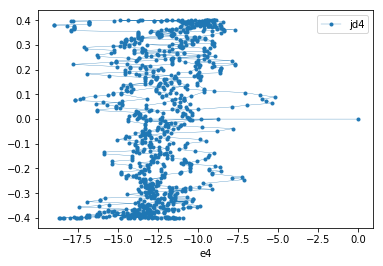

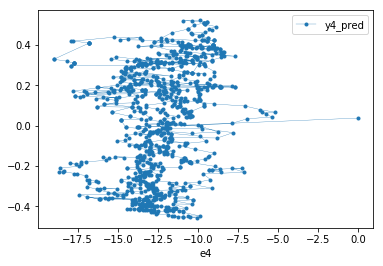

In [34]:
fig7 = plt.figure(); df_val[0:1000].plot(x = 'e4', y = 'jd4', marker='.',lw=0.3)
df_val[0:1000].plot(x = 'e4', y = 'y4_pred', marker='.',lw=0.3); plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

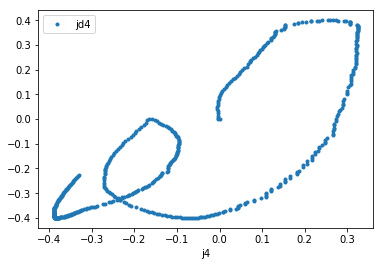

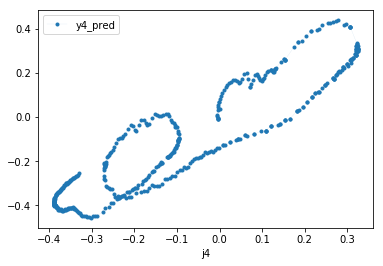

In [35]:

fig8 = plt.figure(); df_val[0:500].plot(x = 'j4', y = 'jd4', marker='.',lw=0.05)
df_val[0:500].plot(x = 'j4', y = 'y4_pred', marker='.',lw=0.05); plt.legend(loc='best')

### Neuronas  con función de activación tanh
Se utiliza un modelo de 1 input layer de 20 neuronas lineales, 2 hidden layers de 20 neuronas tanh y 1 output layer de 2 neuronas lineales.  

In [28]:
model3 = Sequential()
model3.add(Dense(units=20, activation='linear', input_dim=2))
model3.add(Dense(units=20, activation='tanh'))
model3.add(Dense(units=20, activation='tanh'))
model3.add(Dense(units=1, activation='linear'))

model3.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])

(number_training_data, _) = df.shape
q_tmp = df.j7.values.reshape(number_training_data,1)
T_tmp = df.e7.values.reshape(number_training_data,1)
qd_tmp = df.jd7
x_train = np.concatenate([q_tmp, T_tmp], axis =1)
y_train = qd_tmp.values.reshape(number_training_data,1)
#print x_train.shape

In [29]:
model3.fit(x_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
50001/50001 [==============================] - 5s 95us/step - loss: 2.8819e-04 - acc: 2.0000e-05
Epoch 2/10
50001/50001 [==============================] - 4s 88us/step - loss: 1.3268e-05 - acc: 2.0000e-05
Epoch 3/10
50001/50001 [==============================] - 4s 83us/step - loss: 1.3604e-05 - acc: 2.0000e-05
Epoch 4/10
50001/50001 [==============================] - 5s 92us/step - loss: 1.4294e-05 - acc: 2.0000e-05
Epoch 5/10
50001/50001 [==============================] - 5s 93us/step - loss: 1.4052e-05 - acc: 2.0000e-05
Epoch 6/10
50001/50001 [==============================] - 4s 87us/step - loss: 1.4676e-05 - acc: 2.0000e-05
Epoch 7/10
50001/50001 [==============================] - 5s 90us/step - loss: 1.4271e-05 - acc: 2.0000e-05
Epoch 8/10
50001/50001 [==============================] - 4s 88us/step - loss: 1.4547e-05 - acc: 2.0000e-05
Epoch 9/10
50001/50001 [==============================] - 5s 90us/step - loss: 1.4136e-05 - acc: 2.0000e-05
Epoch 10/10
50001/50001 [===

In [30]:
model3.evaluate(x_eval, y_eval, batch_size=50)

10001/10001 [==============================] - 0s 44us/step


[0.00017780011091296104, 9.998999876494932e-05]

<Figure size 432x288 with 0 Axes>

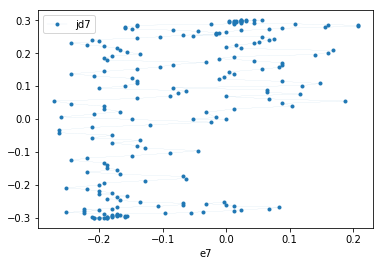

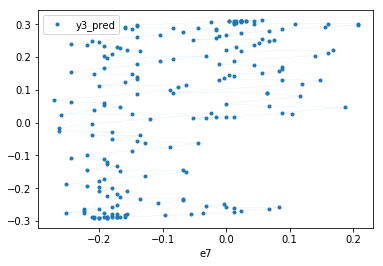

In [31]:
y3_pred = model3.predict(x_val)
df_val['y3_pred'] = y3_pred
fig9 = plt.figure(); df_val[0:200].plot(x = 'e7', y = 'jd7', marker='.',lw=0.05)
df_val[0:200].plot(x = 'e7', y = 'y3_pred', marker='.',lw=0.05); plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

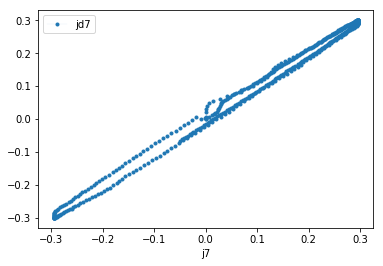

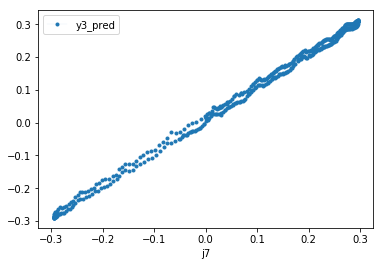

In [35]:
fig10 = plt.figure(); df_val[0:500].plot(x = 'j7', y = 'jd7', marker='.',lw=0.05)
df_val[0:500].plot(x = 'j7', y = 'y3_pred', marker='.',lw=0.05); plt.legend(loc='best')

### Neuronas  con función de activación elu (model 4)
Se utiliza un modelo de 1 input layer de 20 neuronas lineales, 2 hidden layers de 20 neuronas elu y 1 output layer de 2 neuronas lineales.  

In [36]:
model4 = Sequential()
model4.add(Dense(units=20, activation='linear', input_dim=2))
model4.add(Dense(units=20, activation='elu'))
model4.add(Dense(units=20, activation='elu'))
model4.add(Dense(units=1, activation='linear'))

model4.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])

In [37]:
model4.fit(x_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
50001/50001 [==============================] - 4s 75us/step - loss: 1.5998e-04 - acc: 2.0000e-05
Epoch 2/10
50001/50001 [==============================] - 3s 69us/step - loss: 1.5754e-05 - acc: 2.0000e-05
Epoch 3/10
50001/50001 [==============================] - 3s 67us/step - loss: 1.5190e-05 - acc: 2.0000e-05
Epoch 4/10
50001/50001 [==============================] - 3s 66us/step - loss: 1.5352e-05 - acc: 2.0000e-05
Epoch 5/10
50001/50001 [==============================] - 3s 67us/step - loss: 1.4887e-05 - acc: 2.0000e-05
Epoch 6/10
50001/50001 [==============================] - 3s 67us/step - loss: 1.4812e-05 - acc: 2.0000e-05
Epoch 7/10
50001/50001 [==============================] - 3s 69us/step - loss: 1.4470e-05 - acc: 2.0000e-05
Epoch 8/10
50001/50001 [==============================] - 3s 70us/step - loss: 1.3959e-05 - acc: 2.0000e-05
Epoch 9/10
50001/50001 [==============================] - 3s 70us/step - loss: 1.4177e-05 - acc: 2.0000e-05
Epoch 10/10
50001/50001 [===

In [38]:
model4.evaluate(x_eval, y_eval, batch_size=50)

10001/10001 [==============================] - 0s 50us/step


[3.3041127614063134e-05, 9.998999876494932e-05]

<Figure size 432x288 with 0 Axes>

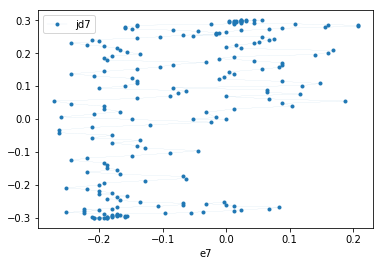

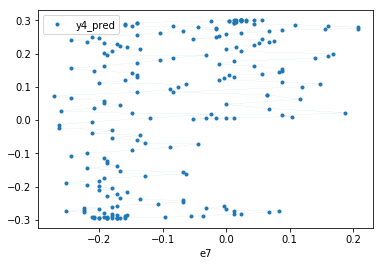

In [39]:
y4_pred = model4.predict(x_val)
df_val['y4_pred'] = y4_pred
fig11 = plt.figure(); df_val[0:200].plot(x = 'e7', y = 'jd7', marker='.',lw=0.05)
df_val[0:200].plot(x = 'e7', y = 'y4_pred', marker='.',lw=0.05); plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

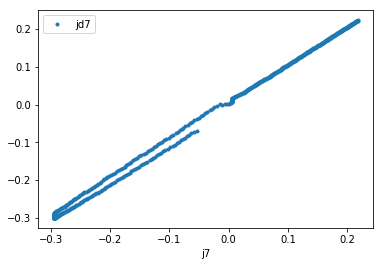

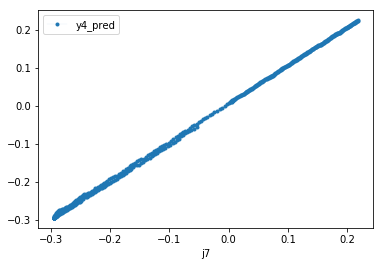

In [43]:
fig12 = plt.figure(); df_val[500:1000].plot(x = 'j7', y = 'jd7', marker='.',lw=0.05)
df_val[500:1000].plot(x = 'j7', y = 'y4_pred', marker='.',lw=0.05); plt.legend(loc='best')

### Neuronas  con función de activación LeakyReLU (model 5)
Se utiliza un modelo de 1 input layer de 20 neuronas lineales, 2 hidden layers de 20 neuronas LeakyReLU y 1 output layer de 2 neuronas lineales.  

In [41]:
model5 = Sequential()
model5.add(Dense(units=20, activation='linear', input_dim=2))
model5.add(Dense(units=20, activation=LeakyReLU(alpha=0.3)))
model5.add(Dense(units=20, activation=LeakyReLU(alpha=0.3)))
model5.add(Dense(units=1, activation='linear'))

model5.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])

/usr/local/lib/python2.7/dist-packages/keras/activations.py:197: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [42]:
model5.fit(x_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
50001/50001 [==============================] - 4s 83us/step - loss: 6.9236e-04 - acc: 2.0000e-05
Epoch 2/10
50001/50001 [==============================] - 4s 73us/step - loss: 1.1412e-05 - acc: 2.0000e-05
Epoch 3/10
50001/50001 [==============================] - 4s 71us/step - loss: 1.0597e-05 - acc: 2.0000e-05
Epoch 4/10
50001/50001 [==============================] - 4s 73us/step - loss: 1.0698e-05 - acc: 2.0000e-05
Epoch 5/10
50001/50001 [==============================] - 4s 72us/step - loss: 1.1274e-05 - acc: 2.0000e-05
Epoch 6/10
50001/50001 [==============================] - 4s 72us/step - loss: 1.0566e-05 - acc: 2.0000e-05
Epoch 7/10
50001/50001 [==============================] - 4s 74us/step - loss: 1.1525e-05 - acc: 2.0000e-05
Epoch 8/10
50001/50001 [==============================] - 4s 71us/step - loss: 1.0558e-05 - acc: 2.0000e-05
Epoch 9/10
50001/50001 [==============================] - 4s 72us/step - loss: 1.0168e-05 - acc: 2.0000e-05
Epoch 10/10
50001/50001 [===

In [44]:
model5.evaluate(x_eval, y_eval, batch_size=50)

10001/10001 [==============================] - 1s 53us/step


[3.595215256979881e-05, 9.998999876494932e-05]

<Figure size 432x288 with 0 Axes>

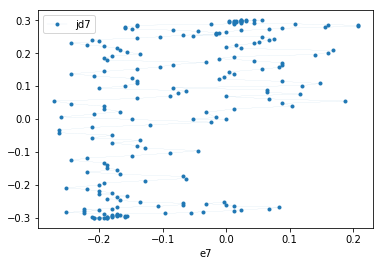

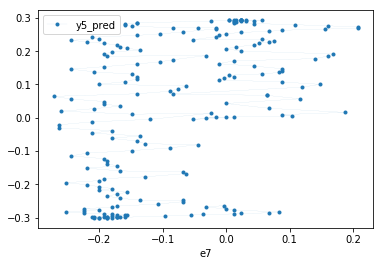

In [45]:
y5_pred = model5.predict(x_val)
df_val['y5_pred'] = y5_pred
fig13 = plt.figure(); df_val[0:200].plot(x = 'e7', y = 'jd7', marker='.',lw=0.05)
df_val[0:200].plot(x = 'e7', y = 'y5_pred', marker='.',lw=0.05); plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

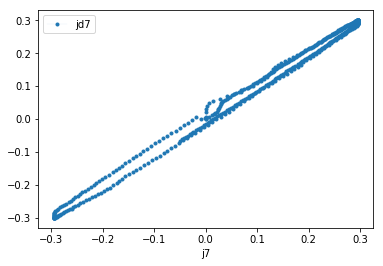

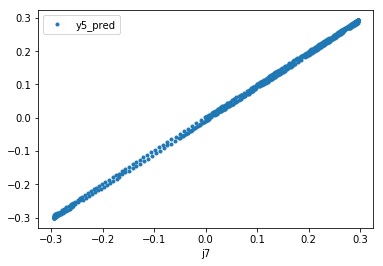

In [47]:
fig14 = plt.figure(); df_val[0:500].plot(x = 'j7', y = 'jd7', marker='.',lw=0.05)
df_val[0:500].plot(x = 'j7', y = 'y5_pred', marker='.',lw=0.05); plt.legend(loc='best')

In [ ]:
new_data = 